In [134]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [135]:
parallel_configs=[(1,1),(1,2),(2,1),(2,2)]

In [136]:
log_dir="./logs"
def parse_times(tp=1, pp=1):
    req_times=[]
    res_times=[]
    with open(f'{log_dir}/energon-seq-{tp}{pp}.log', 'r') as file:
        for line in file:
            if 'server req' in line:
                match = re.search(r'server req (\d+) time: (\d+\.\d+)', line)
                # print("Found")
                req_id = match.group(1)
                req_time = match.group(2)
                req_times.append(float(req_time))
            if 'response' in line:
                match = re.search(r'server response (\d+) time: (\d+\.\d+)', line)
                # print("Found")
                res_id = match.group(1)
                res_time = match.group(2)
                # print(res_time)
                res_times.append(float(res_time))
                # print(res_times)

    # Remove first warm up request
    # print(req_times)
    # print(res_times)
    latency=[]
    for i in range(len(req_times)):
        latency.append(res_times[i]-req_times[i])

    return (
        req_times[1:], 
        res_times[1:],
        latency[1:]
    )

[0.10032762799944196, 0.10032468912552814, 0.10030404402285206, 0.10030431163554289]


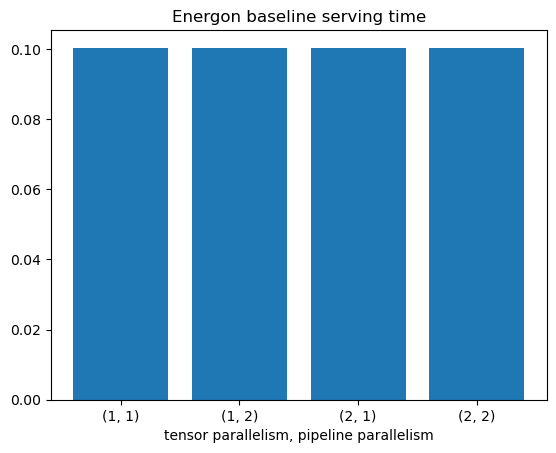

In [137]:
times = []
# parse_times(1,1)
for pc in parallel_configs:
    lat=parse_times(*pc)[2]
    latency=sum(lat)/len(lat)
    times.append(latency)

print(times)
# times = np.array(times) # (parallel_config, timer, request)
# mean_times = np.mean(times, axis=2)
# print(mean_times)

rows = [str(p) for p in parallel_configs]
cols = ["Average latency"]
# plt.axis("off")
# plt.axis("tight")
tab = plt.bar(rows,times)
plt.title("Energon baseline serving time")
plt.xlabel("tensor parallelism, pipeline parallelism")
# tab.scale(1, 2)
plt.show()

Text(0.5, 1.0, 'Computron Baseline - OPT 13B')

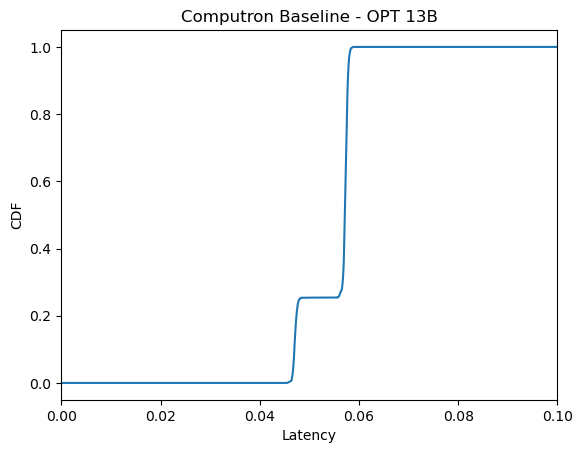

In [138]:
req_times=[]
res_times=[]
latency = []
with open('logs/computron-baseline.log', 'r') as file:
    for line in file:
        if 'req time' in line:
            req_time = re.search(r'req time: (\d+\.\d+)', line).group(1)
            req_times.append(float(req_time))
        elif 'response time' in line:
            res_time = re.search(r'response time: (\d+\.\d+)', line).group(1)
            res_times.append(float(res_time))
for i in range(len(req_times)):
    # print(res_times[i],req_times[i])
    latency.append(res_times[i]-req_times[i])

# print(latency)
latency=latency[1:]
data=latency
# print(data)
x = np.sort(data)
# print(x)
y = 1. * np.arange(len(data)) / (len(data) - 1)

x=np.append([0],x)
y=np.append([0],y)
x=np.append(x,[0.08,0.19])
plt.xlabel('Latency')
plt.ylabel('CDF')
y=np.append(y,[1,1])
plt.xlim((0,0.1))
plt.plot(x, y, label="computron")
plt.title("Computron Baseline - OPT 13B")

In [139]:
#CDF
